# Linear and Logistic Regression in TensorFlow

## Dataset
[Fire and Theft in Chicago](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr05.html)

## Reference

[CS 20SI: TensorFlow for Deep Learning Research](http://web.stanford.edu/class/cs20si/lectures/notes_03.pdf)

## Notice:
In the so called "stochastic" gradient descent applied in this notebook, the data is not shuffled in each iteration. So it is not stochastic gradient descent technically.


### Import corresponding libraries.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

### Read dataset.

In [2]:
FILE_NAME=r".\data\slr05.xls"
book=xlrd.open_workbook(filename=FILE_NAME,encoding_override="UTF-8")
sheet=book.sheet_by_index(0)
data=np.asarray([sheet.row_values(i) for i in range(1,sheet.nrows)])

### Create graph.

In [3]:
X=tf.placeholder(dtype=tf.float32,name="X")
Y=tf.placeholder(dtype=tf.float32,name="Y")
w=tf.Variable(0.0,name="w")
b=tf.Variable(0.0,name="b")
Y_pred=w*X+b
loss=tf.square(Y-Y_pred,name="loss")
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

### Train $w$, $b$ with stochastic gradient descent in a session.

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):#Number of iterations
        for x,y in data:
            sess.run(optimizer,feed_dict={X:x,Y:y})
    w_val,b_val=sess.run([w,b])
print("w:",w_val,"b:",b_val)

w: 2.03623 b: 2.48112


### Plot and evaluate fitting.

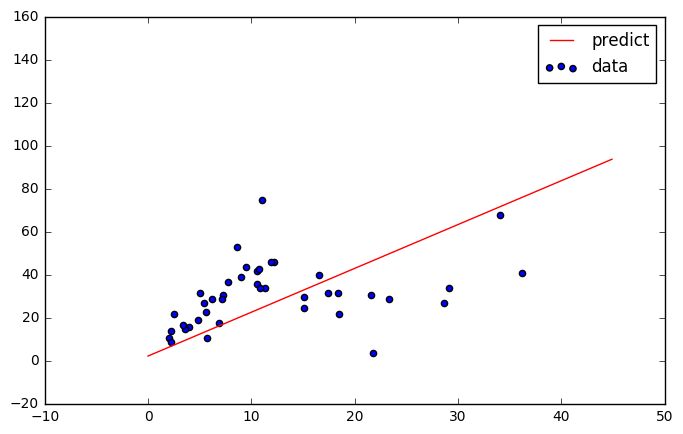

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=w_val*x_plot+b_val
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.legend()
plt.show()

### Train $w$, $b$ with batch gradient descent in another session.

In [6]:
#Need to use new learning rate for batch gradient descent.
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)#Use new optimizer (with smaller learning rate).
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):#Number of iterations
        sess.run(optimizer,feed_dict={X:data.T[0],Y:data.T[1]})
    w_val,b_val=sess.run([w,b])
print("w:",w_val,"b:",b_val)

w: 1.9417 b: 4.52292


### Plot and evaluate fitting.

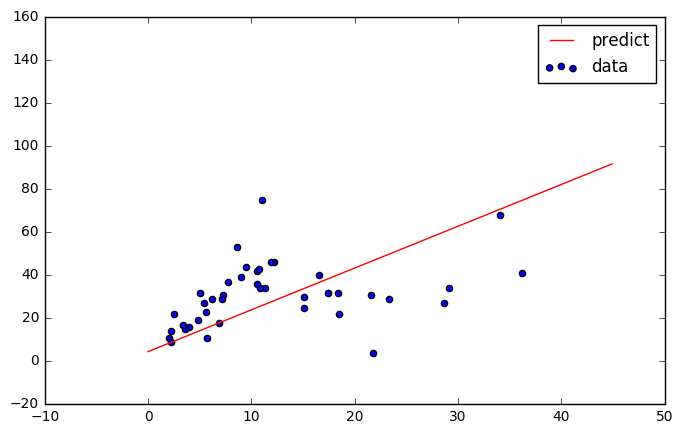

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=w_val*x_plot+b_val
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.legend()
plt.show()

### Create new graph for regression.

In [8]:
X=tf.placeholder(dtype=tf.float32,name="X")
Y=tf.placeholder(dtype=tf.float32,name="Y")
w3=tf.Variable(0.0,name="w3")
w2=tf.Variable(0.0,name="w2")
w1=tf.Variable(0.0,name="w1")
w0=tf.Variable(0.0,name="w0")
Y_pred=w3*X*X*X+w2*X*X+w1*X+w0
loss=tf.square(Y-Y_pred)
#optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-12).minimize(loss)
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

### Train $w_{3}$, $w_{2}$, $w_{1}$, $w_{0}$ with stochastic gradient descent in a session.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1500):#Number of iterations
        for x,y in data:
            sess.run(optimizer,feed_dict={X:x,Y:y})
    param=sess.run([w3,w2,w1,w0])
for i in range(4):
    print("w{}: {}".format(3-i,param[i]))

w3: 0.005395066924393177
w2: -0.266002893447876
w1: 3.071977138519287
w0: 16.279937744140625


### Plot and evaluate fitting.

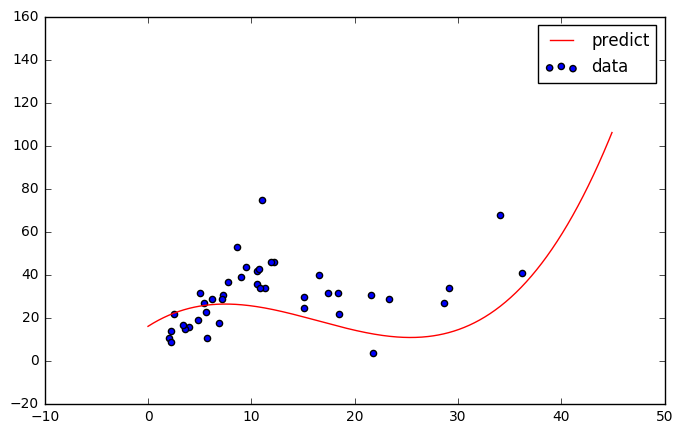

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=param[0]*(x_plot**3)+param[1]*x_plot**2+param[2]*x_plot+param[3]
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.legend()
plt.show()

### Import MNIST dataset.

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
MNIST=input_data.read_data_sets(r"/data/mnist",one_hot=True)

Extracting /data/mnist\train-images-idx3-ubyte.gz
Extracting /data/mnist\train-labels-idx1-ubyte.gz
Extracting /data/mnist\t10k-images-idx3-ubyte.gz
Extracting /data/mnist\t10k-labels-idx1-ubyte.gz


### Create graph.

In [12]:
learning_rate=0.01
batch_size=128
n_epochs=25
X=tf.placeholder(dtype=tf.float32,name="X",shape=[batch_size,784])
Y=tf.placeholder(dtype=tf.float32,name="Y",shape=[batch_size,10])
W=tf.Variable(tf.random_normal(shape=[784,10],stddev=0.01),name="weight")
b=tf.Variable(0.0,name="bias")
outln=tf.matmul(X,W)+b
entropy=tf.nn.softmax_cross_entropy_with_logits(logits=outln,labels=Y)
loss=tf.reduce_mean(entropy)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

### Training and testing.

Accuracy 0.9081


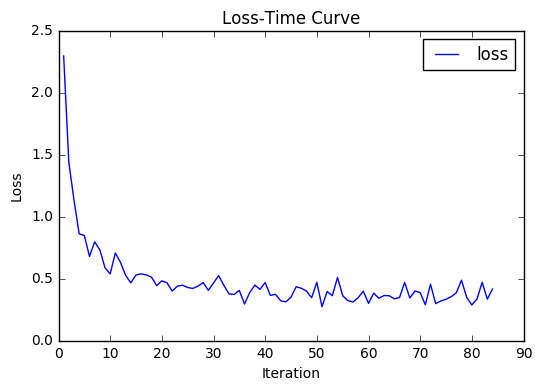

In [13]:
pltLossY=[]
with tf.Session() as sess:
    #Training
    sess.run(tf.global_variables_initializer())
    n_batches=int(MNIST.train.num_examples/batch_size)
    for i in range(n_epochs):
        for j in range(n_batches):
            X_batch,Y_batch=MNIST.train.next_batch(batch_size=batch_size)
            _,loss_val=sess.run([optimizer,loss],feed_dict={X:X_batch,Y:Y_batch})
            pltLossY.append(loss_val)
    #Testing
    n_batches=int(MNIST.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range (n_batches):
        X_batch,Y_batch=MNIST.test.next_batch(batch_size)
        preds=sess.run(outln,feed_dict={X:X_batch,Y:Y_batch})
        #preds=tf.nn.softmax(preds)
        correct_preds=tf.equal(tf.argmax(preds,1),tf.argmax(Y_batch,1 ))
        batch_correct_preds=tf.reduce_sum(tf.cast(correct_preds,tf.float32)) # similar
        #to numpy.count_nonzero(boolarray) :(
        total_correct_preds+=sess.run(batch_correct_preds)
#Print accuracy        
print("Accuracy {0}".format(total_correct_preds/MNIST.test.num_examples))
pltLossY=[enum[1] for enum in enumerate(pltLossY) if enum[0]%batch_size==0]
pltLossY=np.array(pltLossY)
pltLossX=np.arange(1,np.shape(pltLossY)[0]+1,1)
plt.plot(pltLossX,pltLossY,label="loss",color="blue")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss-Time Curve")
plt.legend()
plt.show()

### Save graphs.

In [14]:
writer=tf.summary.FileWriter(r"./graphs",tf.get_default_graph())
writer.close()